<a href="https://colab.research.google.com/github/devadathprabhu/DSC612/blob/main/L7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> 10.000


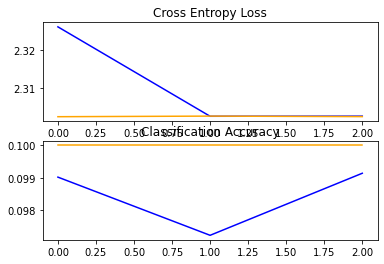

In [32]:
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                       input_shape=(32, 32, 3)))
      model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D((2, 2),strides=(2,2)))
      model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D((2, 2),strides=(2,2)))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D((2, 2),strides=(2,2)))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D((2, 2),strides=(2,2)))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D((2, 2),strides=(2,2)))
      model.add(Flatten())
      model.add(Dense(128, activation='relu',
                      kernel_initializer='he_uniform',
                      kernel_regularizer=l2(0.001)))
      model.add(Dense(10, activation='softmax'))
 
      opt = Adam(lr=0.001)
      model.compile(optimizer=opt, loss='categorical_crossentropy',
                    metrics=['accuracy'])
      return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=3, batch_size=64,
                     validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()